# Gradient Descent - Combined Cycle Power Plant

Combined Cycle Power Plant dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

You are given:

1. A Readme file for more details on dataset. 
2. A Training dataset csv file with X train and Y train data
3. A X test File and you have to predict and submit predictions for this file.

Your task is to:

1. Code Gradient Descent for N features and come with predictions.
2. Try and test with various combinations of learning rates and number of iterations.
3. Try using Feature Scaling, and see if it helps you in getting better results. 

Read Instructions carefully -

1. Use Gradient Descent as a training algorithm and submit results predicted.
2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
3. Submit a csv file with only predictions for X test data. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form.
4. Your score is based on coefficient of determination. So it can be possible that nobody gets full score.


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

Attribute Information:

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


# Loading data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's take a look at our data
train_data = np.genfromtxt("training_ccpp_x_y_train.csv", delimiter=',')
test_data = np.genfromtxt("test_ccpp_x_test.csv", delimiter=',')

In [3]:
train_df = pd.DataFrame(train_data,columns = ['Temperature', 'Ambient Pressure', 'Relative Humidity', 'Exhaust Vaccum','Electricity consumed'])
test_df = pd.DataFrame(test_data, columns = ['Temperature', 'Ambient Pressure', 'Relative Humidity', 'Exhaust Vaccum'])

In [4]:
train_df.head()

,Temperature,Ambient Pressure,Relative Humidity,Exhaust Vaccum,Electricity consumed
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [5]:
test_df.head()

,Temperature,Ambient Pressure,Relative Humidity,Exhaust Vaccum
0,11.95,42.03,1017.58,90.89
1,12.07,38.25,1012.67,81.66
2,26.91,74.99,1005.64,78.98
3,20.58,39.53,1005.68,62.09
4,16.78,37.20,1011.97,68.94


# Feature Scaling

In [6]:
# splitting training data into x and y datasets

from sklearn import preprocessing

In [7]:
scaled_train = preprocessing.minmax_scale(train_data[:,:4],feature_range=(0, 1))
scaled_train

array([[0.19935218, 0.2316726 , 0.69636229, 0.7883378 ],
       [0.58833922, 0.58434164, 0.60183123, 0.55201072],
       [0.43669022, 0.41921708, 0.46176689, 0.71313673],
       ...,
       [0.82420495, 0.78256228, 0.40757238, 0.52520107],
       [0.42873969, 0.51494662, 0.61989607, 0.51032172],
       [0.83333333, 0.65266904, 0.44048503, 0.3002681 ]])

In [8]:
scaled_train.shape

(7176, 4)

In [9]:
scaled_test = preprocessing.minmax_scale(test_data[:,:4],feature_range=(0, 1))
scaled_test

array([[0.25407649, 0.30369831, 0.60278129, 0.87421726],
       [0.25763415, 0.2348333 , 0.47863464, 0.74857065],
       [0.69759858, 0.90417198, 0.30088496, 0.71208821],
       ...,
       [0.62081233, 0.74494443, 0.38811631, 0.88783011],
       [0.59620516, 0.31772636, 0.51125158, 0.52600054],
       [0.54491551, 0.63599927, 0.63767383, 0.79485434]])

In [10]:
scaled_test.shape

(2392, 4)

In [18]:
X = scaled_train
Y = train_data[:,4]

### Implementing Gradient Descent

In [19]:
def add(m,x):
    sum = 0
    for i in range(len(x)):
        sum += m[i]*x[i]
    return sum

In [20]:
def cost(X,Y, learning_rate, m, c):
    total = 0
    M = len(X)
    
    for i in range(M):
        x = X[i,:]
        y = Y[i]
        total += (1/M)*((y - add(m,x) - c)**2)
    return total

In [21]:
def step_gradient(X,Y, learning_rate, m, c):
    c_slope = 0
    slopes = [0]*4
    M = len(X)
    
    for i in range(M):
        
        x = X[i,:]
        y = Y[i]
        
        for j in range(len(x)):
            slopes[j] += (-2/M)*(y-add(m,x)-c)*x[j]
        c_slope += (-2/M)*(y-add(m,x)-c)
    
    for i in range(len(m)):
        m[i] = m[i] - learning_rate*slopes[i]
    c = c - learning_rate*c_slope
    
    return m,c

In [22]:
def GD(X,Y, learning_rate, iterations):
    m = [0]*4
    c = 0
    costs = []
    for i in range(iterations):
        m,c = step_gradient(X,Y, learning_rate, m, c)
        cost_ach = cost(X,Y, learning_rate, m, c)
        costs.append(cost_ach)  
    return m,c,costs

In [23]:
def run(X,Y):
    print("Enter Learning_rate:")
    learning_rate = float(input())
    print()
    print("Enter Number of iterations to be run:")
    iterations = int(input())
    ans,c,costs = GD(X,Y, learning_rate, iterations)
    for i in range(len(ans)):
        print('m{}:'.format(i),ans[i])
    print('C:',c)
    return ans,c, costs

In [28]:
coeffs, c, costs = run(X,Y)

Enter Learning_rate:
0.35

Enter Number of iterations to be run:
1200
m0: -59.95177551821415
m1: -17.246399012752427
m2: 6.073316994712252
m3: -8.393561277211429
C: 497.05110141782444


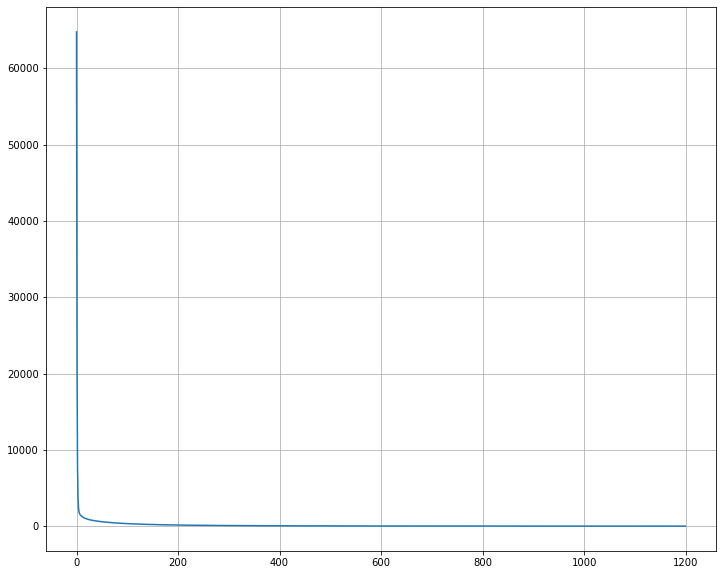

In [29]:
plt.plot(costs)
plt.grid()
plt.rcParams['figure.figsize'] = (12,10)
plt.show()

In [31]:
costs[-1] - costs[-2]

-0.002882439995904207

In [32]:
y_preds = []
M = len(scaled_test)
for i in range(M):
    y_pred = np.sum(coeffs*scaled_test[i]) + c
    y_preds.append(y_pred)
y_preds

[472.90414827800043,
 474.1791738971287,
 435.4855310619362,
 459.8139924756047,
 467.48341750271425,
 450.44348034651836,
 481.1645079276288,
 448.2044886333586,
 485.87116650333456,
 441.8072954455624,
 436.8460043594884,
 434.44773399386213,
 475.0736107877039,
 466.3996754435855,
 446.8253050761604,
 459.3078661715444,
 488.859796826851,
 449.1736126199274,
 428.91985087901,
 440.7588782242731,
 442.06278608796094,
 484.1063603843813,
 461.5509173044502,
 476.96906296767526,
 433.70479576037906,
 436.20785714139555,
 470.27867486248056,
 473.09812746794,
 435.2674162873747,
 478.7188362669008,
 444.43010000631455,
 433.62725598330485,
 451.50068972724114,
 473.13728410102135,
 471.85544637704277,
 474.8367662911523,
 449.471739190957,
 457.911862813329,
 446.5828539487448,
 483.12229605383385,
 468.7335870912989,
 436.2369245961678,
 475.75660233651246,
 470.41645087064313,
 463.55443311612396,
 485.2163081156079,
 439.4197260767679,
 432.06412580747394,
 442.00872769514154,
 478.1

In [33]:
ans = np.savetxt('ans_PP.csv',y_preds)